## Exercise 4.2 Theory of ICA

### 4.2.1 Difference between _uncorrelated_ and _statistical independence_

The goal of this part is to understand the difference between _uncorrelated_ and _statistical independent_ data sets.

In the previous part, you have seen that principal component analysis (PCA) finds a set of __orthogonal (uncorrelated)__  basis vectors pointing in the directions of maximal variance of the data set. Formally, two random variables X,Y are defined to be uncorrelated $:\Longleftrightarrow$ their covariance $\bf \operatorname{cov}(X,Y) = E(XY) − E(X)E(Y)$ is zero. Now, remember the Pearson correlation coefficient:

\begin{equation} \bf \rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y} \end{equation}
If you compare the definition of uncorrelated and the definition of the correlation coefficient, you can easily see that two random variables with non-zero variance are uncorrelated $\Longleftrightarrow$ their correlation coefficient is zero. 

Independent component analysis (ICA) on the other hand is trying to find a set of basis vectors which are __statistically independent__. On an intuitive level, statistical independence between $\mathbf X$ and $\mathbf Y$ means that information about the outcome of $\mathbf X$ does not change the probability of the outcome of the other variable $\mathbf Y$. More rigorously, two random variables $\mathbf X$ and $\mathbf Y$ with cumulative distribution functions $F_X(x)$ and $F_Y(y)$, and probability density function $f_X(x)$ and $f_Y(y)$, are independent $\Longleftrightarrow$ the combined random variable $(\mathbf X, \mathbf Y)$ has a joint cumulative distribution function $F_{X,Y}(x,y)$ satisfying:

\begin{equation} F_{X,Y}(x,y) = F_X(x) F_Y(y) \end{equation}

__Task:__ Review the concepts of the correlation coefficient and statistical independence and answer the following question:

#### Q4.2.1 Which of the data sets in (x,y) are uncorrelated? Which are statistically independent? Which of the two properties is stronger?

__Hint:__ The correlation coefficient is zero (and thus X, Y are uncorrelated) if the slope of a linear fit is zero.

![title](data/Independence.png)

### 4.2.2 Basics about ICA

Next, we want to cover the basics of independent component analysis (ICA). ICA is a computational method for separating a multivariate signal (e.g. sounds) into (independent) additive subcomponents (e.g. speakers or singers). 

The standard model for ICA for the same number of sources and signals is:

\begin{equation} 
\mathbf x = \mathbf {A s}
\end{equation}

where $\mathbf x=(x_i,...x_D)$ is a column vector with the observations (e.g. in time) $\mathbf x_i \in \mathbb R^T$, $\mathbf s=(s_1,...s_D)$ is the source vector containing the original components $\mathbf s_i \in \mathbb R^T$ and $\mathbf A \in \mathbb R^{D \times D}$ is a linear transformation that defines the linear mixing of the constituent signals. Typically, $\mathbf A$ and $\mathbf s$ are unknown. 

__Task__: Review the lecture slides or other literature about ICA and answer the following questions:

#### Q4.2.2 What are the central assumptions for the ICA to work? 

----

### 4.2.3 Ambiguities in ICA

In comparison to PCA, ICA has two major ambiguities:

1. We cannot determine the variances (energies) of the independent components.
2. We cannot determine the order of the independent components.

#### Q4.2.3 Why do these ambiguities occur? __Hint__: Answer this questions by looking at the standard model $\mathbf x = \mathbf {As}$.
-----

### 4.2.4  FastICA and negentropy

Here, you will use an implementation of ICA which is called FastICA. It is an iterative fixed-point scheme which is minimizing the entropy (or equivalently maximizing the negative entropy (negentropy)) in order to find the independent components. 

The entropy of a random variable can be interpreted as the degree of information that the observation of the variable gives. The more “random”, i.e.  unpredictable and unstructured the variable is, the larger its entropy. 

#### Q4.2.4 Find out which special property the normal distribution has with respect to entropy for a fixed variance. How can this property be used for finding the independent components?

---

### 4.2.5 Preprocessing

Before applying ICA, most algorithms expect you to preprocess your data. Commonly, two preprocessing steps are applied before performing an ICA: __Centering__ and __Whitening__.

__Centering__ is done by simply subtracting the sample mean, i.e. $\bf x_c = x - \bar x$. This is equivalent to a translation of the data such that they are positioned around the origin.

__Whitening__ is a transformation that converts the data such that it has an identity covariance matrix. Let $\hat \Sigma$ be the estimated covariance matrix. Then $\bf x_w = \hat \Sigma^{-\frac{1}{2}} x_c$ would be the new whitened vector with zero mean and identity covariance matrix. 

One popular method for whitening is to use the eigenvalue decomposition (EVD) of the covariance matrix: $\bf \hat \Sigma = EDE^T$ where ${\bf E}$ is the orthogonal matrix of eigenvectors of $\hat \Sigma$ and ${\bf D}$ is the diagonal matrix of its eigenvalues, ${\bf D}= \mbox{diag}(d_1,...,d_D)$. Whitening can now be done by computing

\begin{equation} {\bf x_w}={\bf E}{\bf D}^{-1/2}{\bf E}^T {\bf x_c} \end{equation} 

where the matrix ${\bf D}^{-1/2}$ is computed by a simple component-wise operation as ${\bf D}^{-1/2}=\mbox{diag}(d_1^{-1/2},...,d_D^{-1/2})$.

Below you see an implementation and the effect of centering and whitening.

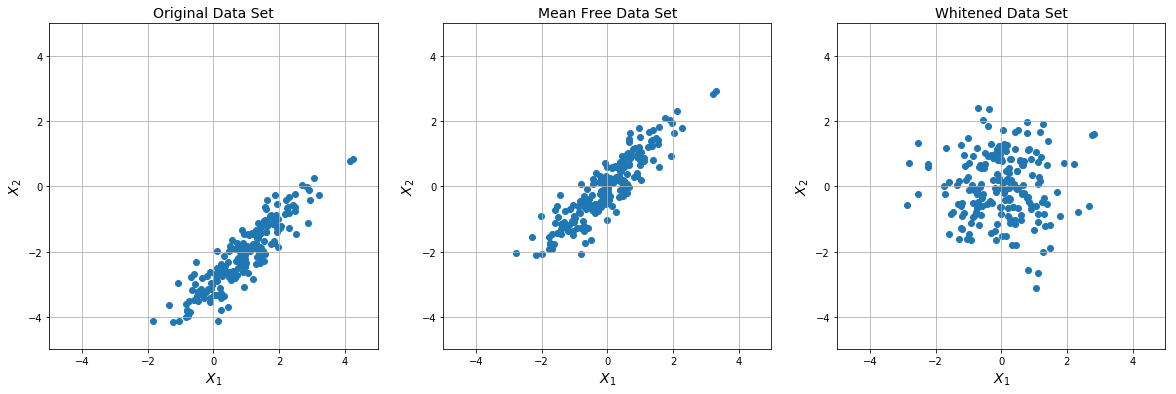

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Create normally distributed data-set
N_samples = 200;
X=np.random.multivariate_normal([1,-2],[[1,0.9],[0.9,1]],N_samples)

# Centering
X_meanfree = X - np.mean(X,axis=0) 

# Whitening
X_cov = np.cov(X.T)
[D,E] = np.linalg.eig(X_cov)
D = np.diag(1/np.sqrt(D))
X_white = np.dot(np.dot(np.dot(E,D),E.T),X_meanfree.T).T
#print(np.cov(X_white.T)) #Should be identity

#Draw the figure
f, ax = plt.subplots(1, 3,figsize=(20, 6))    
for k in range(3):
    if k==0:
        X_temp = X
        ax[k].set_title('Original Data Set',fontsize = 14)
    elif k == 1:
        X_temp = X_meanfree
        ax[k].set_title('Mean Free Data Set',fontsize = 14)
    elif k == 2:
        X_temp = X_white 
        ax[k].set_title('Whitened Data Set',fontsize = 14)           
    
    #X_temp = np.array(X_temp)
    ax[k].scatter(X_temp[:,0],X_temp[:,1])
    ax[k].set_xlim([-5,5])
    ax[k].set_ylim([-5,5])
    ax[k].grid()
    ax[k].set_xlabel('$X_1$',fontsize = 14)
    ax[k].set_ylabel('$X_2$',fontsize = 14)

#### Q4.2.5 Why is it useful to whiten the data?